<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2023<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Simulated Annealing <br>
<font color=696880 size=4>
    Reza Soumi, Rouzbeh Pirayadi, Amir Mohammad Izadi

____

# Personal Data

In [106]:
# Set your student number
student_number = '98110402'
Name = 'Pooriya'
Last_Name = 'Safaei'

# Rules
- Make sure that all of your cells can be run perfectly. 

# Q2: DNA Center Point (100 Points)

<font size=4>
Author: Rouzbeh Pirayadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [107]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

Alphabet = np.array(['a', 'c', 'g', 't'])

## Problem Definition

DNA is composed of four nucleic-acid bases. namely A, C, G and T. We consider DNA as a string from these four characters. In this exercise we want to find the center of a group of DNAs. In order to define center we need to first define distance between two DNAs (strings). Note that DNAs have the same length, so their distsance could be defined as:
$$
dist(a, b) = \sum_{a[i] \neq b[i]} 1
$$
for example the distance between the below DNAs is two since they are different in two indecies.
$$
AGGCT
$$
$$
ACGCA
$$

Now we can define the center of a set of DNAs as follows.
$$
center(S) = \arg \min_{a}{\{\max_{i \in S}{\{dist(a, i)}\}\}}
$$
In other words center of a set of DNAs is a DNA which its distance from the furthest DNA in the set is the least. Below is an example.

$$
center(\{ACCT, AGCG, ACTG\}) = \{ACCG\}
$$

Note that center is not necassarily unique. Look at the below case for instance.

$$
center(\{AA, AC, AG\}) = \{AA, AC, AG, AT\}
$$

However the maximum distance of the center is unique. We call this value the radius of the set.

$$
radius(S) = \min_{a}{\{\max_{i \in S}{\{dist(a, i)}\}\}}
$$
$$
radius(\{AA, AC, AG\}) = 1
$$

Our goal is to find the center and the radius utilizing __simulated annealing__.

## Initializing States

First we must model our problem, so we will be able to solve it. Our solution is a string with the same length as the objects in $S$. In order to represent the solutions which are the states in our problem, we use a numpy array of characters.

In [108]:
def initialize_state(n):
    if n <= 0:
        return np.array([])  

    random_vector = np.array([random.choice(Alphabet) for _ in range(n)])
    return random_vector


## Evaluation Function

We want to start from a state(solution) and try minimizing the distance. In other words the outer minimization of the center formula will be done by simulated annealing so the inner maximization must be done by the evaluation function. As a result the evaluation function , represented by e, is as follows.

$$
f(a) = \max_{i \in S}{dist(a, i)}
$$

In [109]:
def calculate_evaluation(genomes, state):
    max_distance = 0

    for genome in genomes:
        distance = np.count_nonzero(genome != state)
        max_distance = max(max_distance, distance)

    return max_distance


## Neighboring State

In each iteration of __simulatd annealing__ a neighboring state of the current state is accessed. So we need to define neighboring states. Two states are neighbors if they are exactly different at one index.

$$
(a, b) \in N \iff \exists i: a[i] \neq b[i] \land \forall j \neq i: a[j] = b[j]
$$

for example the following states are neighbors.

$$
ACGCT
$$
$$
ACTCT
$$

In [110]:
def get_neighbor_state(state):
    neighbor_state = state.copy()
    mutant_index = random.randint(0, len(neighbor_state) - 1)

    next_char = neighbor_state[mutant_index]
    while next_char == neighbor_state[mutant_index]:
        next_char = random.choice(Alphabet)

    neighbor_state[mutant_index] = next_char
    return neighbor_state

## Temperature and Acceptance Probability

After implementing all the prerequisites we are now able to implement the main algorithm. Consider 
$a_1$ and $a_2$ as the current and new states. The acceptance probability would be as follows.
$$
P(a_1, a_2)= 
\begin{cases}
    1 & f(a_2) < f(a_1) \\
    e ^ {-\frac{(f(a_2) - f(a_2))}{T}} & o.w. \\
\end{cases}
$$
In the above equation T is temperature and changes as below where $i$ is the iteration number.

$$
T = T_0 \times \alpha^i
$$

Now complete the below function according to the comment about input and outputs.

In [111]:
def simulated_annealing(genomes, initial_state, alpha, initial_temp, max_iteration, min_temperature):
    curr_state = initial_state
    i = 0
    temperature = initial_temp
    evaluations = []
    best_state = None
    best_value = float('INF')

    while i < max_iteration and temperature > min_temperature:
        new_state = get_neighbor_state(curr_state)

        current_evaluation = calculate_evaluation(genomes, curr_state)
        new_evaluation = calculate_evaluation(genomes, new_state)

        evaluations.append(current_evaluation)

        if new_evaluation < current_evaluation:
            curr_state = new_state
            if new_evaluation < best_value:
                best_state = new_state
                best_value = new_evaluation

        else:
            if random.random() < np.exp(-(new_evaluation - current_evaluation) / temperature):
                curr_state = new_state

        temperature *= alpha
        i += 1

    return best_state, best_value, evaluations


## Validate

In order to validate our implementation of simulated annealing, we implement a naive way to solve the problem. This algorithm traverses all possible sequences and calculates the solution. Note that your implementation of "calculate_evaluation" needs to be correct for this algorithm to work correctly.

In [112]:
##############################################
# no need to the any thing                   #
##############################################

def go_to_next(number, alphabet_length):
    idx = len(number) - 1
    while idx >= 0:
        if number[idx] < alphabet_length - 1:
            number[idx] += 1
            return True
        else:
            number[idx] = 0
            idx -= 1
    return False


def brute_force(genomes):
    n = len(genomes[0])
    curr_state_index = np.zeros(n).astype(int)
    best_state = None
    best_value = float('INF')

    while True:
        new_result = calculate_evaluation(genomes, Alphabet[curr_state_index])

        if new_result < best_value:
            best_value = new_result
            best_state = Alphabet[curr_state_index]

        if not go_to_next(curr_state_index, len(Alphabet)):
            break

    return best_state, best_value


Run the cell below to compare your algorithm with brute force. your answers should be close to the results acheived from brute force (10 points).

In [113]:
genomes_array = np.array([
                        [['g', 'c', 'a', 't', 'c'],
                         ['g', 'a', 'c', 't', 'c'],
                         ['c', 'a', 'c', 'g', 'c']],
                         [['a', 'c', 'g', 'g', 'g', 'a', 'c'],
                          ['a', 'g', 'g', 'c', 'g', 'a', 'g'],
                          ['c', 'g', 'g', 'g', 'g', 't', 'c']],
                        [['c', 'c', 'a', 'c', 't', 'a', 'g', 'c', 'a'],
                         ['c', 't', 'a', 'g', 't', 'c', 't', 'c', 't'],
                         ['c', 't', 'c', 'c', 't', 'c', 'c', 'c', 'g']]], dtype=object)

for genomes in genomes_array:
    initial_state = initialize_state(len(genomes[0]))
    start_time_sa = time.time()
    result_dna_sa, result_value_sa, _ = simulated_annealing(genomes, initial_state, 0.9, 500, 1000, 1e-3)
    middle_time = time.time()
    result_dna_bf, result_value_bf = brute_force(genomes)
    end_time_bf = time.time()

    print(f'Simulated Annealing found solution {result_dna_sa} with value {result_value_sa} in %.3f milliseconds' %((middle_time - start_time_sa) * 1000))
    print(f'Brute Force         found solution {result_dna_bf} with value {result_value_bf} in %.3f milliseconds' %((end_time_bf - middle_time) * 1000))



Simulated Annealing found solution ['c' 'a' 'a' 't' 'c'] with value 2 in 2.001 milliseconds
Brute Force         found solution ['c' 'a' 'a' 't' 'c'] with value 2 in 12.008 milliseconds
Simulated Annealing found solution ['a' 'g' 'g' 'g' 'g' 'a' 'c'] with value 2 in 2.996 milliseconds
Brute Force         found solution ['a' 'g' 'g' 'g' 'g' 'a' 'c'] with value 2 in 190.419 milliseconds
Simulated Annealing found solution ['c' 't' 'a' 'c' 't' 'c' 'c' 'c' 'a'] with value 3 in 4.002 milliseconds
Brute Force         found solution ['c' 'c' 'a' 'c' 't' 'c' 'c' 'c' 't'] with value 3 in 3768.503 milliseconds


According to the above results, what do you think is the advantage of simulated annealing over brute force (5 points)?

مزیت این روش نسبت به بروت فورس این است که این روش، با انتخاب مقدار مناسب برای دما و ضریب آلفا، میتواند تخمین خوبی از پاسخ مسئله برای ما داشته باشد. از طرف دیگر در کنار تخمین خوبی، این روش در اردر زمانی کمتری نسبت به بروت فورس برای ما انجام میدهد.


## Results

Run the below cells to see the results (10 points).

In [114]:
def  draw_results(evaluations):
    ##############################################
    # no need to the any thing                   #
    ##############################################
    plt.plot(evaluations)
    plt.title('Simulated Annealing algorithm')
    plt.ylabel('value')
    plt.xlabel('iteration')
    plt.show()

In [115]:
example_genomes = np.array([['c', 'c', 'a', 'c', 't', 'a', 'g', 'g', 'a'],
                            ['c', 't', 'a', 'g', 't', 'c', 't', 'g', 'a'],
                            ['c', 't', 'c', 'c', 't', 'c', 'c', 'g', 'a']])
initial_state = initialize_state(len(example_genomes[0]))

results: ['c' 't' 'c' 'g' 't' 'a' 'g' 'g' 'a'] and  radius: 3


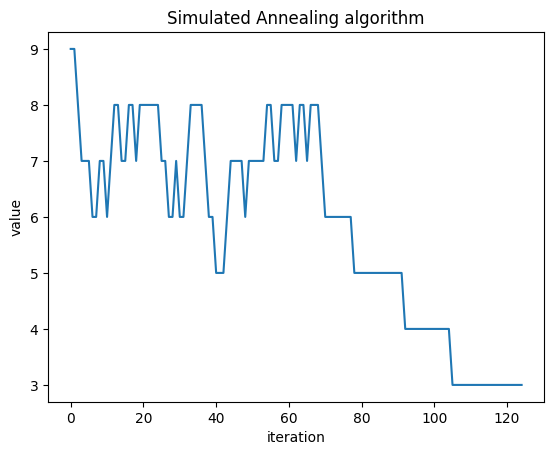

In [116]:
result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.9, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


results: ['c' 't' 'c' 't' 't' 'a' 'a' 'g' 'a'] and  radius: 4


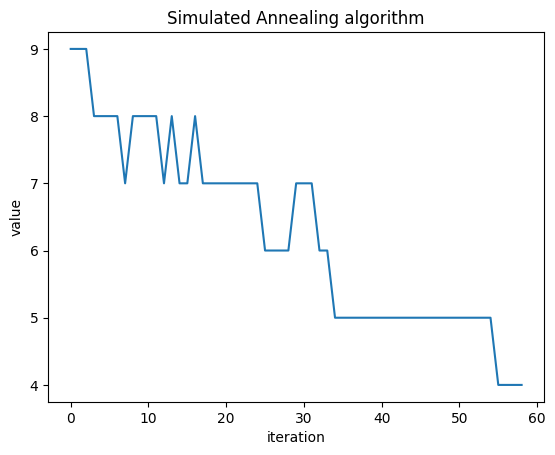

In [117]:

result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.8, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


results: ['c' 't' 't' 'c' 't' 'a' 't' 'g' 'a'] and  radius: 3


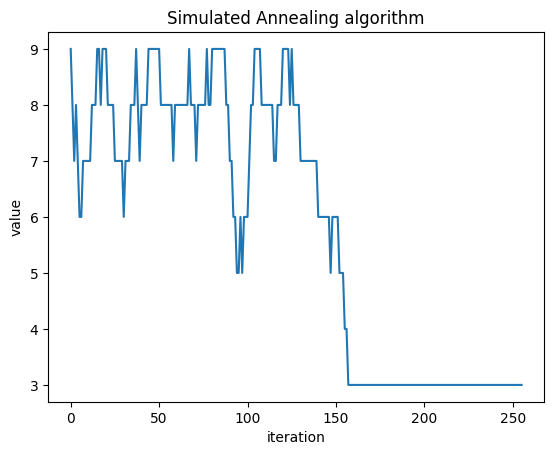

In [118]:
result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.95, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)


Now compare the diagrams for different values of alpha and analyze their shapes (10 points).

همانطور که در مثال های زیر نیز میتوان مشاهده کرد، با تغییر مقدار آلفا اگر آلفا به سمت 1 میل کند، این روش به یک جست و جوی کاملا تصادفی میل میکند و هر بار رشته های جدیدتری را مشاهده میکنیم.
اما اگر مقدار الفا را کم قرار دهیم و به صفر نزدیک کنیم، این روش همیشه به دنبال انتخاب بهترین گزینه است و عامل تصادف از جست و جو به طور کامل حذف میشود و این روش معادل با hill climbing میشود.



results: ['c' 't' 'a' 'a' 't' 'a' 'c' 'g' 'a'] and  radius: 3


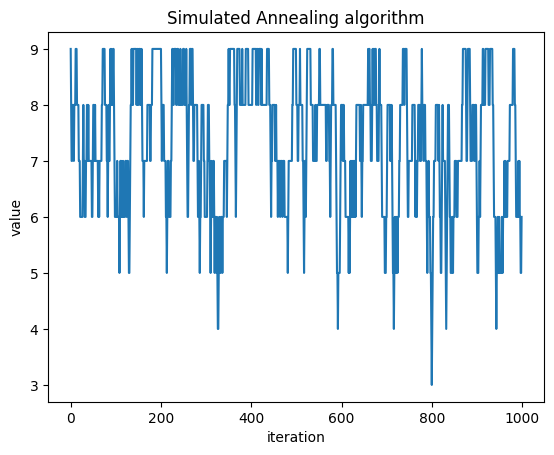

In [119]:
#############################################
###     This block is for alpha = 1       ###
#############################################

result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 1, 500, 1000, 1e-3)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)

results: ['c' 't' 'a' 'c' 't' 'c' 'g' 'g' 'a'] and  radius: 2


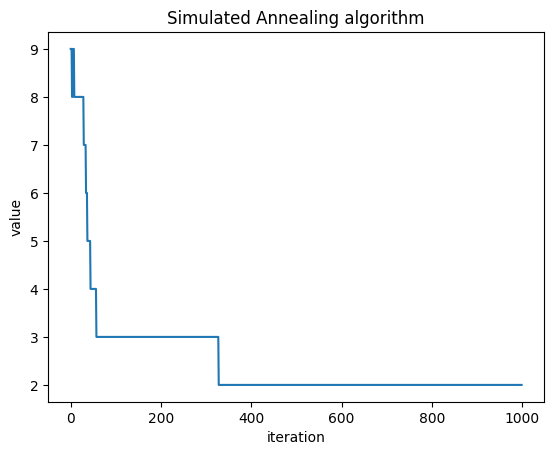

In [120]:
#############################################
###     This block is for alpha = 0.7     ###
#############################################

result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.5, 500, 1000, 1e-300)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)

results: ['c' 't' 'a' 'c' 't' 'c' 'g' 'g' 'a'] and  radius: 2


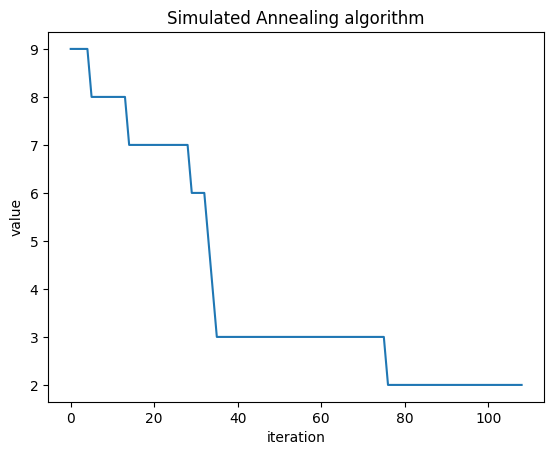

In [121]:
#############################################
###     This block is for alpha ~= 0      ###
#############################################

result_dna, result_value, evaluations = simulated_annealing(example_genomes, initial_state, 0.001, 500, 1000, 1e-3000)
print(f'results: {result_dna} and  radius: {result_value}')
draw_results(evaluations)